<a href="https://colab.research.google.com/github/FaezehMosayyebi/Auto_Encoder/blob/main/autoencoder_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Extract the dataset.zip
import shutil
shutil.unpack_archive('/content/drive/MyDrive/BSDS500.zip', '/content/dataset1')

In [ ]:
# Loading dataset
from tensorflow.keras.preprocessing import image_dataset_from_directory

BATCH_SIZE = 64
IMG_SIZE = (600, 600)


train_dir      = '/content/dataset1/BSDS500/train'
test_dir       = '/content/dataset1/BSDS500/test'

train_dataset = image_dataset_from_directory(train_dir,
                                       labels=None,
                                       shuffle=True,
                                       color_mode="grayscale",
                                       batch_size=BATCH_SIZE,
                                       image_size=IMG_SIZE)

Found 450 files belonging to 1 classes.
Found 50 files belonging to 1 classes.


In [ ]:
print(train_dataset.shape)

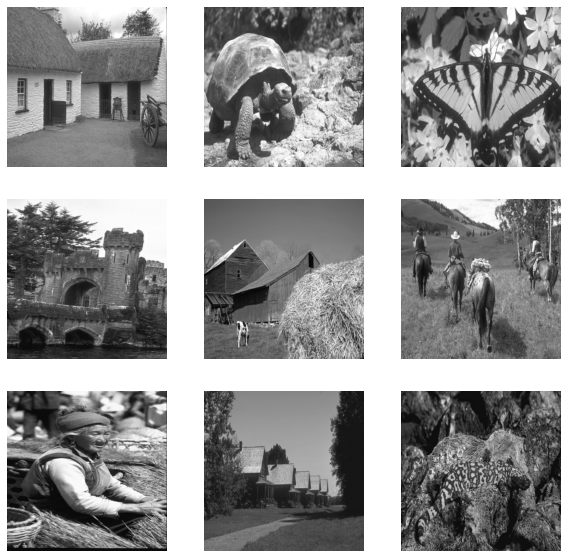

In [ ]:
# Saple images of BSDS500 dataset
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10, 10))
for images in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i][:,:,0], cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
    plt.axis("off")

In [ ]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[0], cmap = 'gray')

In [ ]:
x_train.shape

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
encoder = keras.models.Sequential()
encoder.add(keras.layers.Conv2D(32, 1, strides=1, padding='same', activation='relu', input_shape=(600,600,1), name= "layer1"))
encoder.add(keras.layers.MaxPooling2D(2, strides=2))
encoder.add(keras.layers.Conv2D(64, 1, strides=1, padding='same', activation='relu', name= "layer2"))
encoder.add(keras.layers.MaxPooling2D(2, strides=2))
encoder.add(keras.layers.Conv2D(128, 1, strides=1, padding='same', activation='relu', name= "layer3"))
encoder.add(keras.layers.MaxPooling2D(2, strides=2))
encoder.add(keras.layers.Conv2D(256, 1, strides=1, padding='same', activation='relu', name= "layer4"))
encoder.add(keras.layers.MaxPooling2D(2, strides=2))
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Conv2D)             (None, 600, 600, 32)      64        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 300, 300, 32)     0         
 )                                                               
                                                                 
 layer2 (Conv2D)             (None, 300, 300, 64)      2112      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 150, 150, 64)     0         
 2D)                                                             
                                                                 
 layer3 (Conv2D)             (None, 150, 150, 128)     8320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 128)      0

In [ ]:
decoder = keras.models.Sequential()
decoder.add(keras.layers.Conv2D(256, 1, strides=1, padding='same', activation='relu', input_shape=encoder.output.shape[1:]))
decoder.add(keras.layers.UpSampling2D(2))
decoder.add(keras.layers.Conv2D(128, 1, strides=1, padding='same', activation='relu'))
decoder.add(keras.layers.UpSampling2D(2))
decoder.add(keras.layers.Conv2D(16, 1, strides=1, padding='same', activation='relu'))
decoder.add(keras.layers.UpSampling2D(2))
decoder.add(keras.layers.Conv2D(3, 1, strides=1, padding='same', activation='relu'))
decoder.add(keras.layers.UpSampling2D(2))
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 37, 37, 256)       65792     
                                                                 
 up_sampling2d (UpSampling2D  (None, 74, 74, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 128)       32896     
                                                                 
 up_sampling2d_1 (UpSampling  (None, 148, 148, 128)    0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 148, 148, 16)      2064      
                                                                 
 up_sampling2d_2 (UpSampling  (None, 296, 296, 16)    

In [ ]:
conv_autoencoder = keras.Model(inputs=encoder.input, outputs=decoder(encoder.outputs))
conv_autoencoder.compile(optimizer='adam', loss=keras.losses.mean_squared_error)
history = conv_autoencoder.fit(train_dataset,train_dataset, batch_size=BATCH_SIZE, epochs=40, validation_data=test_dataset)

ValueError: ignored

In [ ]:
encoder_input = keras.Input(shape=(600,600,1), name="img")
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder=keras.Model(encoder_input, encoder_output, name="encoder")

decoder_input=keras.layers.Dense(784, activation="relu")(encoder_output)
decoder_output=keras.layers.Reshape((28,28,1))(decoder_input)

opt= keras.optimizers.Adam(lr=0.001, decay=1e-6)

autoencoder=keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

In [ ]:
autoencoder.compile(opt, loss="mse")
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1)

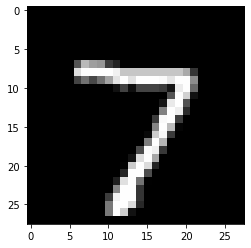

In [ ]:
plt.imshow(x_test[0], cmap="gray")

In [ ]:
example=autoencoder.predict([x_test[0].reshape(-1,28,28,1)])[0]
plt.imshow(example.reshape(28,28), cmap="gray")